Импортируем библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем файл

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head(12)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Убирвем ID, потому что он нам не очень нужен

In [3]:
df = df.drop('CustomerID', axis=1)

# 📌 Проверка на дубликаты и пустые ячейки

Выводим информацию по файлу, видим, что нет пустых ячеек

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


<Axes: >

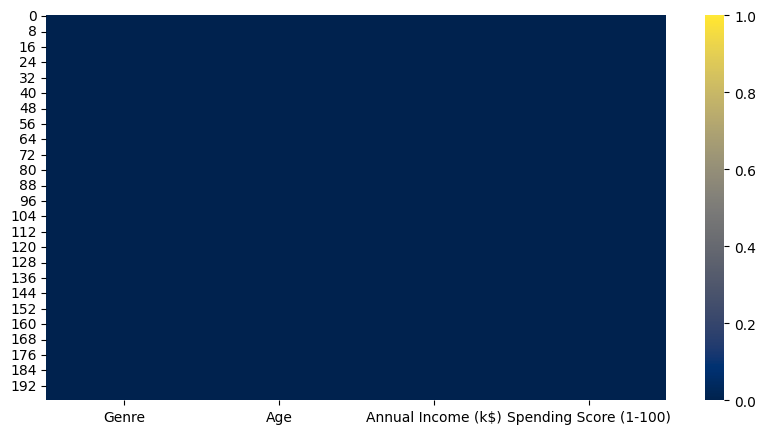

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), vmin=0.0, vmax=1.0, cmap='cividis')

Проверяем на дупликаты

In [6]:
duplecates = df.duplicated().sum()
print("Кол-во дупликатов: ",duplecates)

Кол-во дупликатов:  0


# 📌 Проверка на выбросы

In [7]:
df_setect_out=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
df_setect_out

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Определяем выбросы

In [8]:
outlier_cols = []

for column in df_setect_out.columns:
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Annual Income (k$)']


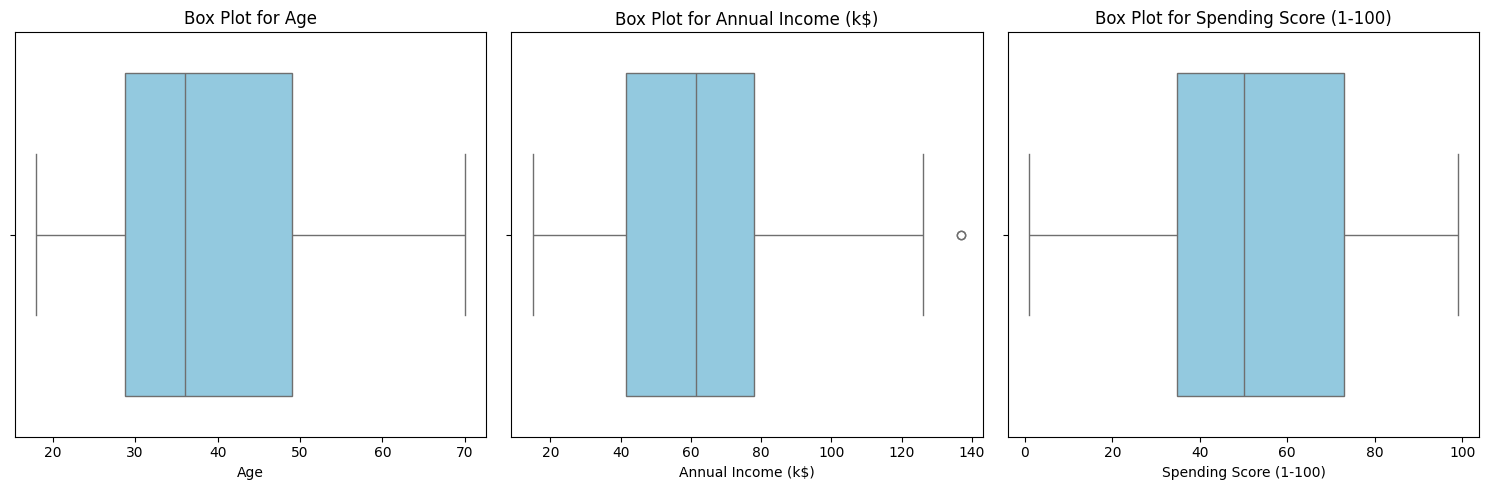

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(15, 5))

for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

Выбросы в Заменим на среднее значение

In [10]:
data = {
    'Annual Income (k$)': [15, 35, 55, 75, 95, 115, 126]
}

df_select_out = pd.DataFrame(data)

def replace_outliers(column, replace_value):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value

for col in ['Annual Income (k$)']:
    replace_outliers(df_select_out[col], replace_value=df_select_out[col].median())

# 📌 Кодировка данных

In [11]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


Просматриваем корреляцию

<Axes: >

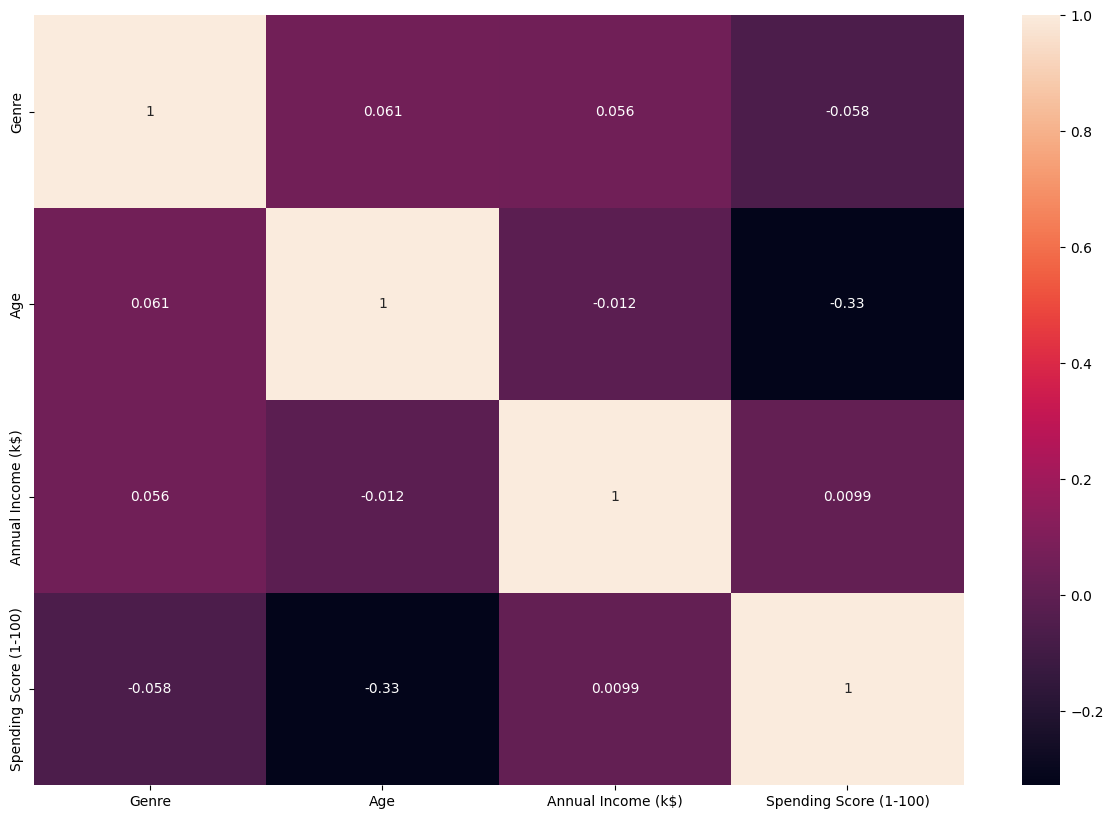

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)

# 📌 Стандартизируем данные

In [13]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

С помощью метода локтя вычисялем количество кластеров

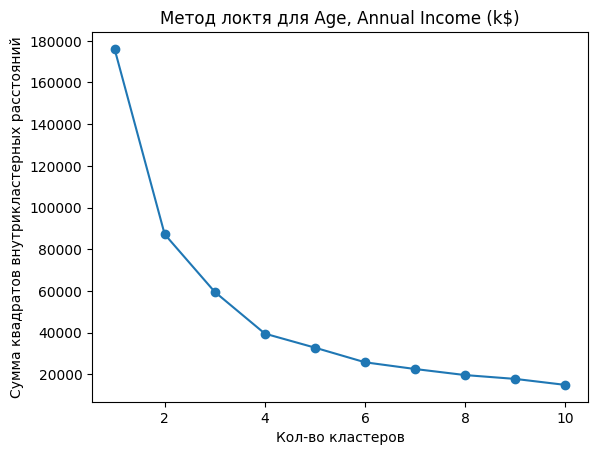

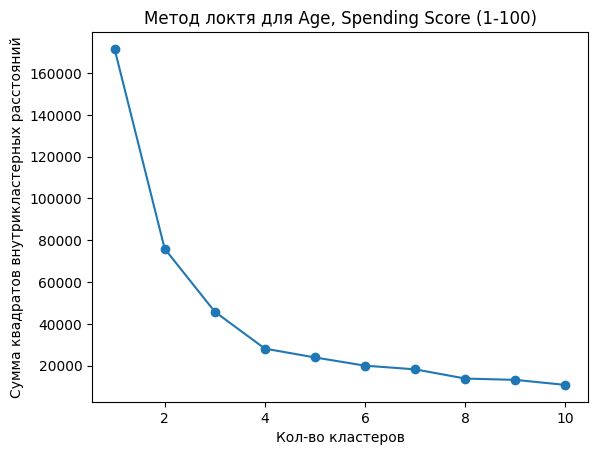

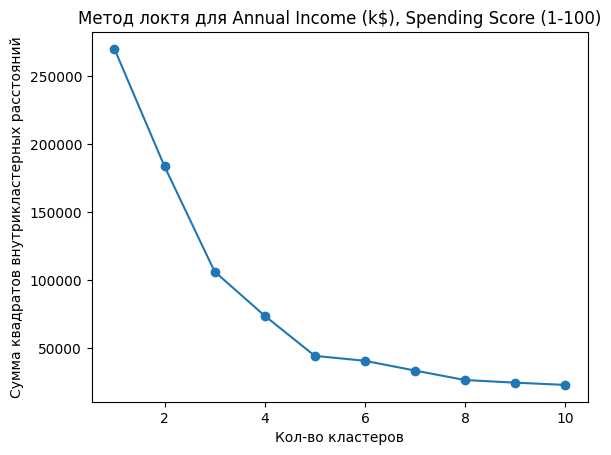

In [14]:
from sklearn.cluster import KMeans
column = df.columns[1:]
for i in range(len(column)):
    for j in range(i + 1, len(column)):
        dta = df[[column[i], column[j]]]
        sse = []
        for k in range(1, 11):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(dta)
            sse.append(kmeans.inertia_)
        plt.plot(range(1, 11), sse, marker='o')
        plt.title(f'Метод локтя для {column[i]}, {column[j]}')
        plt.xlabel('Кол-во кластеров')
        plt.ylabel('Сумма квадратов внутрикластерных расстояний')
        plt.show()

В 2 локтях сильный спуск заканчивается на 4, только в третьем спуск заканчивается на 5. Выберу 5, потому что в дальнейших наблюдениях, этот выбор выглядит логичнее

# Метод K_means

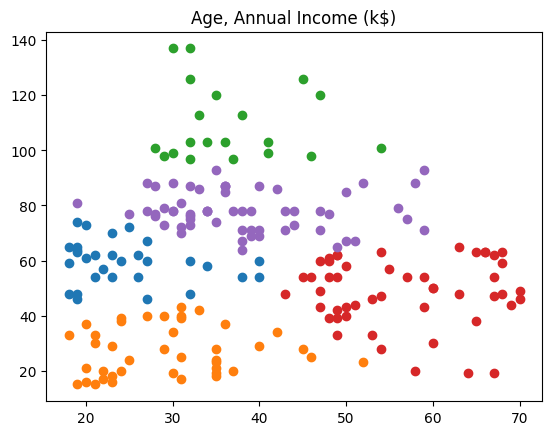

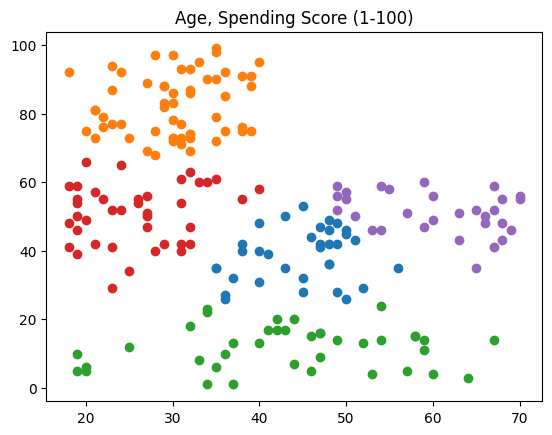

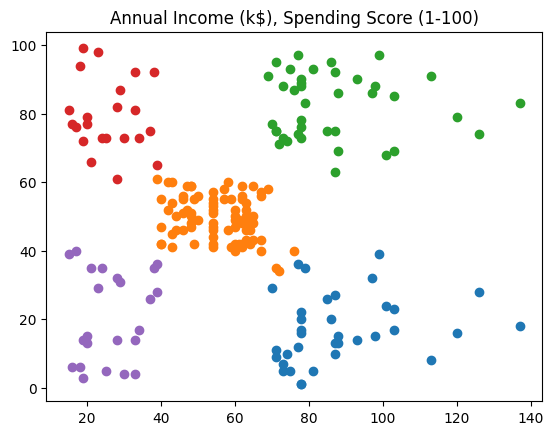

In [19]:
clusters = 5
k_means = KMeans(init='k-means++', n_clusters=clusters, n_init=12)
for i in range(len(column)):
    for j in range(i + 1, len(column)):
        dt = df[[column[i], column[j]]]
        cols = dt.columns
        pred = k_means.fit_predict(dt)
        for k in range(clusters):
            plt.scatter(dt[pred==k][cols[0]] , dt[pred==k][cols[1]])
            plt.title(f'{column[i]}, {column[j]}')
        plt.show()

# Метод DBSCAN

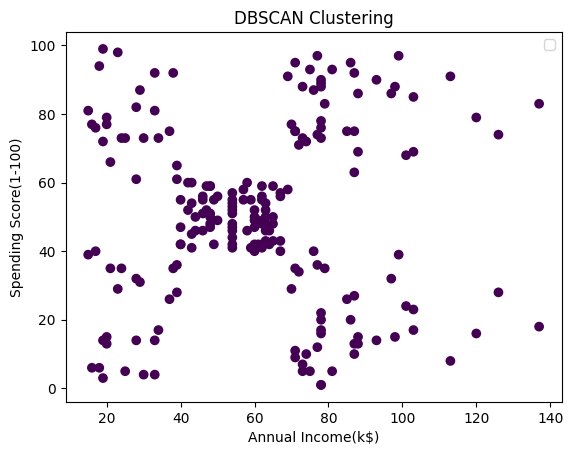

In [31]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=2)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 1], X[:, 2],c=labels.astype(float), alpha=1)

plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

Мы видим здесь людей среднего врозраста с большим и с маленьким доходом, старше в среднем с средне-высоким доходом и люди меньшего возраста со средним доходом и разной оценкой.